<font size='5'><br/>Binary Classification: Breast Cancer<font>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./datasets/cancer.csv')
data.drop(['id','Unnamed: 32'],axis=1, inplace=True)
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


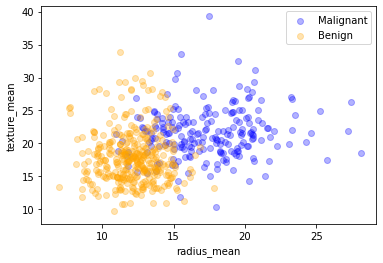

In [2]:
M = data[data.diagnosis == 'M']
B = data[data.diagnosis == 'B']

plt.scatter(M.radius_mean, M.texture_mean, color = 'blue', label = 'Malignant',alpha=0.3)
plt.scatter(B.radius_mean, B.texture_mean, color = 'orange', label = 'Benign',alpha=0.3)
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.legend()
plt.show()

In [7]:
from sklearn.preprocessing import MinMaxScaler
y = data.diagnosis.values
X = data.drop(['diagnosis'], axis=1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
print(X)

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [11]:
# target vectors for classification
y_train_malignant = (y_train == 'M')
y_test_malignant = (y_test == 'M')

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_malignant)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_malignant, cv=3, scoring='accuracy')

array([0.96992481, 0.96240602, 0.96212121])

In [18]:
from sklearn.base import BaseEstimator

class AlwaysBenignClassifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)
    
always_benign_clf = AlwaysBenignClassifier()
cross_val_score(always_benign_clf, X_train, y_train_malignant, cv=3, scoring='accuracy')

array([0.68421053, 0.60902256, 0.58333333])

In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_malignant, cv=3)
confusion_matrix(y_train_malignant, y_train_pred)

array([[246,   3],
       [ 11, 138]])

In [52]:
precision_score(y_train_malignant, y_train_pred)

0.9787234042553191

In [53]:
recall_score(y_train_malignant, y_train_pred)

0.9261744966442953

In [54]:
f1_score(y_train_malignant, y_train_pred)

0.9517241379310345

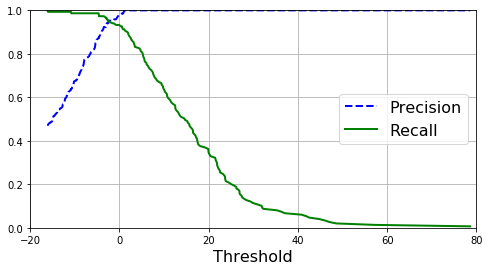

In [55]:
# non-detection of cancer is very severe
# recall is very, even at cost of some precision --> precision/recall trade-off
# we have to lower the treshhold of the classifier to get a higher recall

from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf, X_train, y_train_malignant, cv=3, method='decision_function')
precisions, recalls, thresholds = precision_recall_curve(y_train_malignant, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-20, 80, 0, 1])

plt.figure(figsize=(8, 4))                      # Not shown
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [70]:
threshold_99_recall = thresholds[np.argmin(recalls >= 0.999)]
threshold_99_recall

-15.989659403333572

In [71]:
y_train_pred_99 = (y_scores >= threshold_99_recall)
precision_score(y_train_malignant, y_train_pred_99)

0.4728434504792332

In [72]:
recall_score(y_train_malignant, y_train_pred_99)

0.9932885906040269